In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load clean dataset
df = pd.read_csv("data/cleaned_toronto_dataset.csv")

In [3]:
# Print summary statistics of numerical columns
print(df.describe())

       host_is_superhost  host_identity_verified      latitude     longitude  \
count       16412.000000            16411.000000  16413.000000  16413.000000   
mean            0.246771                0.872281     43.682593    -79.397751   
std             0.431145                0.333787      0.049070      0.069643   
min             0.000000                0.000000     43.585750    -79.621200   
25%             0.000000                1.000000     43.645680    -79.428422   
50%             0.000000                1.000000     43.664240    -79.396900   
75%             0.000000                1.000000     43.706930    -79.373440   
max             1.000000                1.000000     43.837740    -79.127590   

       accommodates      bedrooms          beds         price  minimum_nights  \
count  16413.000000  16413.000000  16413.000000  16413.000000    16413.000000   
mean       3.085725      1.453519      1.694133    150.714903       26.624566   
std        1.953399      0.813532   

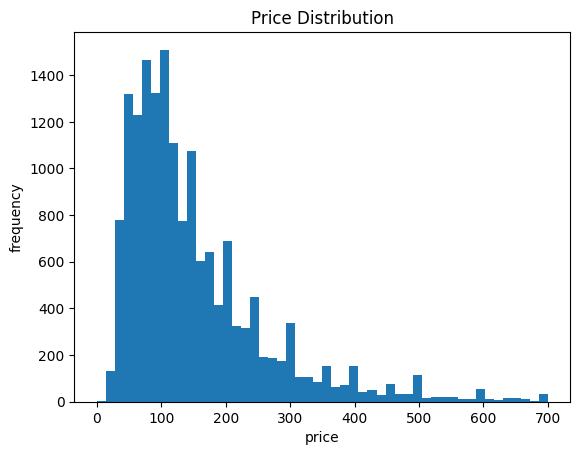

In [4]:
# Look at distribution of price
plt.hist(df["price"], bins=50)
plt.xlabel("price")
plt.ylabel("frequency")
plt.title("Price Distribution")
plt.show()

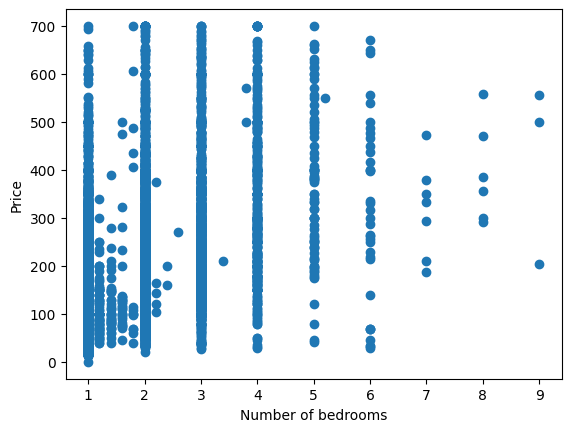

In [5]:
# Scatterplot to visualize number of bedrooms vs price
plt.scatter(df["bedrooms"], df["price"])
plt.xlabel("Number of bedrooms")
plt.ylabel("Price")
plt.show()

<Axes: >

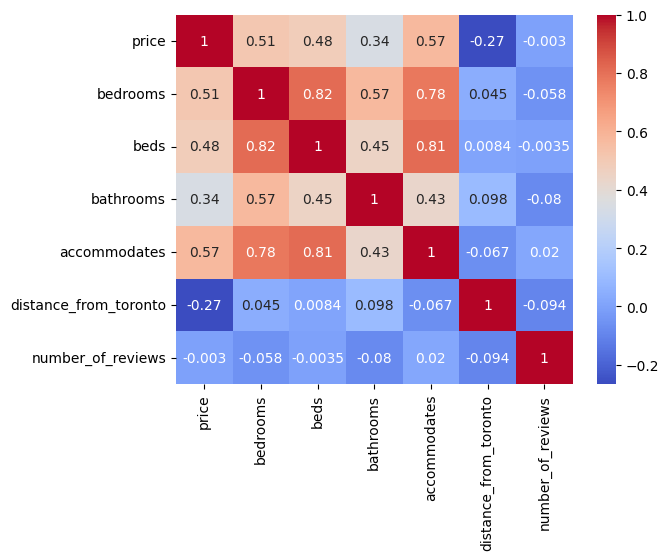

In [6]:
# Create a correlational matrix

# Select the columns of interest
corr_cols = ["price", "bedrooms", "beds", "bathrooms", "accommodates", "distance_from_toronto", "number_of_reviews"]
df_num = df[corr_cols]

# Compute the correlation matrix
corr = df_num.corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm")


Here, we can see that number of bedrooms and number of people accommodated is the most correlated with price. Number of reviews seems to have no correlation.

In [7]:
# neighbourhood_cols = [col for col in df.columns if col.startswith('neighbourhood_cleansed')]

# neighbourhood_freq = df[neighbourhood_cols].sum().sort_values(ascending=False)

# plt.bar(neighbourhood_freq.index, neighbourhood_freq.values)
# plt.xticks(rotation=90)
# plt.xlabel('Neighborhood')
# plt.ylabel('Frequency')
# plt.title('Frequency of Neighborhood')
# plt.show()

We can see that there are many neighbourhoods listed in toronto, however, the most frequent one is "Waterfront Communities - The Island"

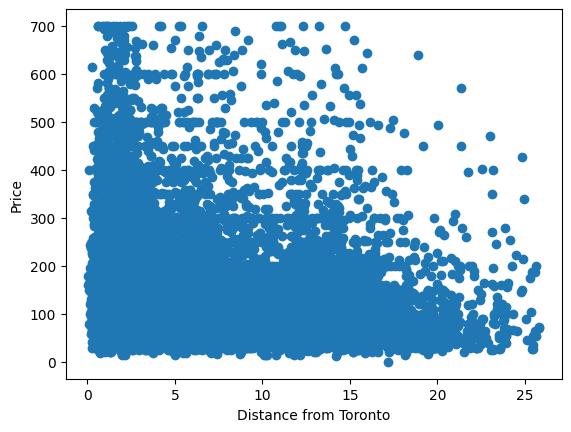

In [8]:
# Use a scatterplot to visualize price vs distance from the CN Tower
plt.scatter(df['distance_from_toronto'], df['price'])
plt.xlabel('Distance from Toronto')
plt.ylabel('Price')
plt.show()

From this scatterplot, we can see that a further an airbnb listing is from the CN Tower, downtown Toronto, the lower the price tends to be.